<a href="https://www.kaggle.com/code/meghanathi1404/mobile-classification-7-different-algorithms?scriptVersionId=118360203" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#  📌   Please keep Vote Up the Note book 🙏 if you find this notebook helpful 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import confusion_matrix , classification_report
import tensorflow as tf
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier



# Importing data

In [2]:
train = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
test = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')

# Let's explore the data 

In [3]:
train 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
test= test.drop('id',axis=1)
test


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [5]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
# cheking null value in dataframe 
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
# columns name
columns = train.columns
columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
X= train.drop('price_range',axis=1)
y= train.price_range


# Let's check that all class is balance
it is really important factor in the machine learning classification problem 

In [9]:
y.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

Class is perfectly balance here 

# Split train test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15, stratify=y)
# unique class value in dataset 
num_of_classes = len(train.price_range.unique())
input_dimension = 20


# Model 

In [11]:
loss = 'sparse_categorical_crossentropy'
model1 = tf.keras.Sequential([
        
        tf.keras.layers.Dense(100, input_dim=input_dimension, activation='relu'),
   
        tf.keras.layers.Dense(200, activation='relu'),
       tf.keras.layers.Dense(300, activation='relu'),
          tf.keras.layers.Dense(400, activation='relu'),
       tf.keras.layers.Dense(500, activation='relu'),
        tf.keras.layers.Dense(num_of_classes, activation='softmax')
    ])

model1.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    


2023-02-06 11:02:26.511260: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-06 11:02:26.600490: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-06 11:02:26.601278: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-06 11:02:26.603127: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [12]:
history = model1.fit(X_train, y_train, epochs=100,verbose = 0)

2023-02-06 11:02:29.423674: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


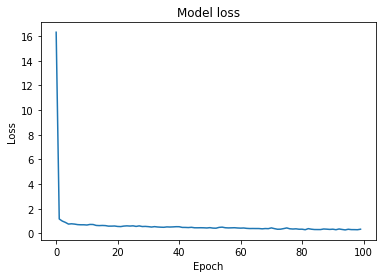

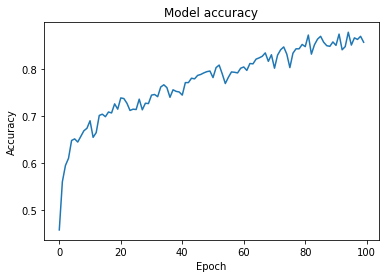

In [13]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [14]:
# Evaluation on the test set

print(model1.evaluate(X_test, y_test))

16/16 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.7400
[0.658237874507904, 0.7400000095367432]


In [15]:
y_pred = model1.predict(X_test)

In [16]:
from sklearn.metrics import classification_report
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       125
           1       0.74      0.76      0.75       125
           2       0.57      0.78      0.66       125
           3       1.00      0.47      0.64       125

    accuracy                           0.74       500
   macro avg       0.79      0.74      0.73       500
weighted avg       0.79      0.74      0.73       500



# Lets try ML algorithms using SKlearn Library 

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc= scaler.transform(X_test)

# Models

In [18]:
# Define the names and instances of various machine learning models
models = [('Logistic Regression', LogisticRegression()),
          ('Linear SVC', LinearSVC()),
          ('Decision Trees', DecisionTreeClassifier()),
          ('Random Forest', RandomForestClassifier()),
          ('Naive Bayes', GaussianNB()),
          ('K-Nearest Neighbor', KNeighborsClassifier())]
          
          
# Create an empty dictionary to store the models
ml_model = {}
for name, model1 in models:
    ml_model[name] = model1
# The above code creates a dictionary where the keys are the names of the ML models 
# and the values are the instances of the corresponding classes from the scikit-learn library.

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

# Initialize dictionaries to store metrics
metrics = {'accuracy': {}, 'precision': {}, 'recall': {}, 'f1_score': {}}

# Evaluate models
for name, model1 in ml_model.items():
    model1.fit(X_train_sc, y_train)
    predictions = model1.predict(X_test_sc)
    predictions = np.round(predictions)
    metrics['accuracy'][name] = accuracy_score(y_test, predictions)
    metrics['precision'][name] = precision_score(y_test, predictions,average='macro')
    metrics['recall'][name] = recall_score(y_test, predictions, average='macro')
    metrics['f1_score'][name] = f1_score(y_test, predictions,average='macro')


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [20]:

df_model = pd.DataFrame(index=ml_model.keys(), columns=['Accuracy', 'Precision', 'Recall','f1_Score'])
df_model['Accuracy'] = metrics['accuracy'].values()
df_model['Precision'] = metrics['precision'].values()
df_model['Recall'] = metrics['recall'].values()
df_model['f1_Score'] = metrics['f1_score'].values()

In [21]:
df_model

,Accuracy,Precision,Recall,f1_Score
Logistic Regression,0.952,0.952262,0.952,0.951937
Linear SVC,0.816,0.806962,0.816,0.810414
Decision Trees,0.836,0.839854,0.836,0.837066
Random Forest,0.878,0.881183,0.878,0.878717
Naive Bayes,0.782,0.789052,0.782,0.784737
K-Nearest Neighbor,0.512,0.546109,0.512,0.517992


# Final verdict , as compare to Neural Network and other ML algorithms Logistic regression is doing far better than other algorithms.

* 📌 Plese Comment if you have any questions or suggestion 

#  📌   Please keep Vote Up the Note book 🙏 if you find this notebook helpful 

# 